In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing
import keras
import tensorflow as tf

ipl = pd.read_csv('/content/ipl_data.csv')
ipl.head()

,mid,date,bat_team,bowl_team,batsman,bowler,runs,wickets,overs,runs_last_5,wickets_last_5,striker,non-striker,total
0,1,18-04-2008,Kolkata Knight Riders,Royal Challengers Bangalore,SC Ganguly,P Kumar,1,0,0.1,1,0,0,0,222
1,1,18-04-2008,Kolkata Knight Riders,Royal Challengers Bangalore,BB McCullum,P Kumar,1,0,0.2,1,0,0,0,222
2,1,18-04-2008,Kolkata Knight Riders,Royal Challengers Bangalore,BB McCullum,P Kumar,2,0,0.2,2,0,0,0,222
3,1,18-04-2008,Kolkata Knight Riders,Royal Challengers Bangalore,BB McCullum,P Kumar,2,0,0.3,2,0,0,0,222
4,1,18-04-2008,Kolkata Knight Riders,Royal Challengers Bangalore,BB McCullum,P Kumar,2,0,0.4,2,0,0,0,222


In [13]:
#Dropping certain features
df = ipl.drop(['date', 'runs', 'wickets', 'overs', 'runs_last_5', 'wickets_last_5','mid', 'striker', 'non-striker'], axis =1)

X = df.drop(['total'], axis =1)
y = df['total']

In [14]:
from sklearn.preprocessing import LabelEncoder

# Create a LabelEncoder object for each categorical feature and Fit the categorical features with label encoding
batting_team_encoder = LabelEncoder()
bowling_team_encoder = LabelEncoder()
striker_encoder = LabelEncoder()
bowler_encoder = LabelEncoder()
X['bat_team'] = batting_team_encoder.fit_transform(X['bat_team'])
X['bowl_team'] = bowling_team_encoder.fit_transform(X['bowl_team'])
X['batsman'] = striker_encoder.fit_transform(X['batsman'])
X['bowler'] = bowler_encoder.fit_transform(X['bowler'])


In [15]:
# Train test Split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
# Fit the scaler on the training data and transform both training and testing data
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [16]:
# Define the neural network model and Compile the model with Huber loss
model = keras.Sequential([
    keras.layers.Input( shape=(X_train_scaled.shape[1],)),  # Input layer
    keras.layers.Dense(512, activation='relu'),  # Hidden layer with 512 units and ReLU activation
    keras.layers.Dense(216, activation='relu'),  # Hidden layer with 216 units and ReLU activation
    keras.layers.Dense(1, activation='linear')  # Output layer with linear activation for regression
])

huber_loss = tf.keras.losses.Huber(delta=1.0)  # You can adjust the 'delta' parameter as needed
model.compile(optimizer='adam', loss=huber_loss)  # Use Huber loss for regression

In [17]:
model.fit(X_train_scaled, y_train, epochs=25, batch_size=64, validation_data=(X_test_scaled, y_test))

Epoch 1/25
832/832 ━━━━━━━━━━━━━━━━━━━━ 7s 6ms/step - loss: 56.8878 - val_loss: 22.1497
Epoch 2/25
832/832 ━━━━━━━━━━━━━━━━━━━━ 11s 7ms/step - loss: 22.5729 - val_loss: 22.4318
Epoch 3/25
832/832 ━━━━━━━━━━━━━━━━━━━━ 9s 6ms/step - loss: 22.6860 - val_loss: 22.2177
Epoch 4/25
832/832 ━━━━━━━━━━━━━━━━━━━━ 7s 8ms/step - loss: 22.5402 - val_loss: 22.2777
Epoch 5/25
832/832 ━━━━━━━━━━━━━━━━━━━━ 5s 6ms/step - loss: 22.3254 - val_loss: 22.3176
Epoch 6/25
832/832 ━━━━━━━━━━━━━━━━━━━━ 5s 6ms/step - loss: 22.4736 - val_loss: 22.1296
Epoch 7/25
832/832 ━━━━━━━━━━━━━━━━━━━━ 6s 7ms/step - loss: 22.5098 - val_loss: 22.2359
Epoch 8/25
832/832 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - loss: 22.4152 - val_loss: 22.2822
Epoch 9/25
832/832 ━━━━━━━━━━━━━━━━━━━━ 8s 8ms/step - loss: 22.4083 - val_loss: 22.1041
Epoch 10/25
832/832 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - loss: 22.4360 - val_loss: 22.3431
Epoch 11/25
832/832 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - loss: 22.3919 - val_loss: 22.1272
Epoch 12/25
832/832 ━━━━━━━━━

<Axes: >

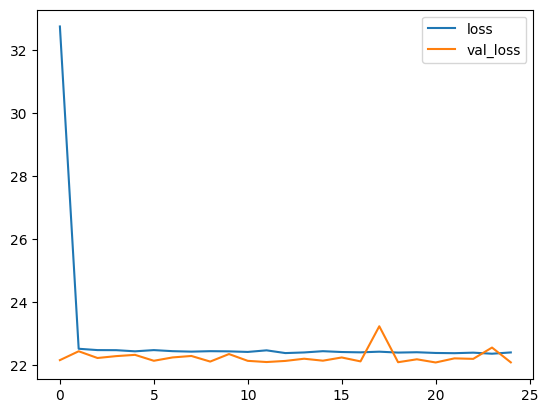

In [18]:
model_losses = pd.DataFrame(model.history.history)
model_losses.plot()

In [19]:
# Make predictions
predictions = model.predict(X_test_scaled)
from sklearn.metrics import mean_absolute_error,mean_squared_error
mean_absolute_error(y_test,predictions)

713/713 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


22.572644283175077

In [21]:
def predict_score():
    #User inputs
    batting_team = input("Enter Batting Team: ")
    bowling_team = input("Enter Bowling Team: ")
    striker = input("Enter Striker: ")
    bowler = input("Enter Bowler: ")

    # Encode the inputs
    encoded_batting_team = batting_team_encoder.transform([batting_team])
    encoded_bowling_team = bowling_team_encoder.transform([bowling_team])
    encoded_striker = striker_encoder.transform([striker])
    encoded_bowler = bowler_encoder.transform([bowler])

    # Prepare the input array
    input_data = np.array([encoded_batting_team[0], encoded_bowling_team[0], encoded_striker[0], encoded_bowler[0]])
    input_data = input_data.reshape(1, -1)

    # Scale the input data
    input_data_scaled = scaler.transform(input_data)

    # Predict the score
    predicted_score = model.predict(input_data_scaled)

    print(f"Predicted Score: {predicted_score[0][0]}")

predict_score()

Enter Batting Team: Sunrisers Hyderabad
Enter Bowling Team: Mumbai Indians
Enter Striker: DA Warner
Enter Bowler: JJ Bumrah
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
Predicted Score: 161.55764770507812


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
